## What Is a Time-Series?
A time-series is a series of data points indexed, listed, or graphed in time order. Most commonly, a time-series is a sequence taken at successive and equally spaced points in time. Thus, it is a sequence of discrete-time data.

It is a subfield of machine learning and statistics that analyzes temporal data.


## What Is Time-Series Forecasting? (Predictive Analytics)
Time-series forecasting is the use of a model to predict future values based on previously observed values. 

Time-series forecasting is performed in nearly every organization that deals with quantifiable data. Some examples include:
    
    Retail stores forecasting sales
    
    Energy companies forecasting reserves, production, demand, and prices
    
    Educational institutions forecasting enrollments
    
    The government forecasting tax receipts and spending
    
    International financial organizations such as the World Bank and International Monetary Fund forecasting inflation     and economic activities
    
    Passenger transport companies use time-series to forecast future travel

## What Is Time-Series Analysis? (Descriptive Analytics)
Time-series analysis comprises methods for analyzing time-series data in order to extract meaningful statistics and other characteristics of the data. Some examples include:
    
    Marketing campaign’s effects on retail stores’ sales
    
    Energy companies use this analysis to see the daily and seasonal effects on power demand
    
    Educational institutions use this for comparing students’ performance over a period of time
    
    The government uses it to check the causal effects of its policies or calamities. (How does demonetization affects inflation?)
    
    Travel companies use this to see how the demand fluctuates in a day, weekend, or holiday.
    
    Almost all websites use A/B testing to check the performance of the website
    
## Steps in a Forecasting Task
1. Visualize the time series- check for trend, seasonality, or random patterns
2. Make the time series stationary- remove trend and seasonality
3. Plot the ACF and PACF charts and find the optimal parameters (p,d,q)
4. Build the ARIMA model and use it to make predictions
5. Evaluate the model using the MSE and RMSE values


### Problem Statement:
    The stock market is one of the most highly sought fields these days. Predicting how the stock price is going to behave will always keep us one step ahead.

### Objective:     
    Visualize the data with the help of the following list of plots, and generate a few insights from the data.
        Time Plot
        
        Stacked Line Charts
        
        Box Plot
        
        Lag Plot
        
        Auto-Correlation Plot

### Dataset:        
The Dataset is the average monthly stock price of a beer production company in Australia from 1991 to 2005.   

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)

import seaborn as sn
sn.set(style='whitegrid', color_codes=True)

ts = pd.read_csv('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course5_Machine Learning/Datasets_sep/Caltech LVC Datasets/Lesson 6/Dataset/stock_price.csv')
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)
ts.head()


(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


### Time Plot
    Is a chart for time versus variable that need to be predicted
    
    Visualizes the pattern (trend and seasonality) in the data
    
    Aggregates data to weeks, months, quarters, and years, and visualizes better detection patterns
    
    Enlarges to specific locations inside the data to get a better view

Text(0.5, 1.0, 'Stock Price')

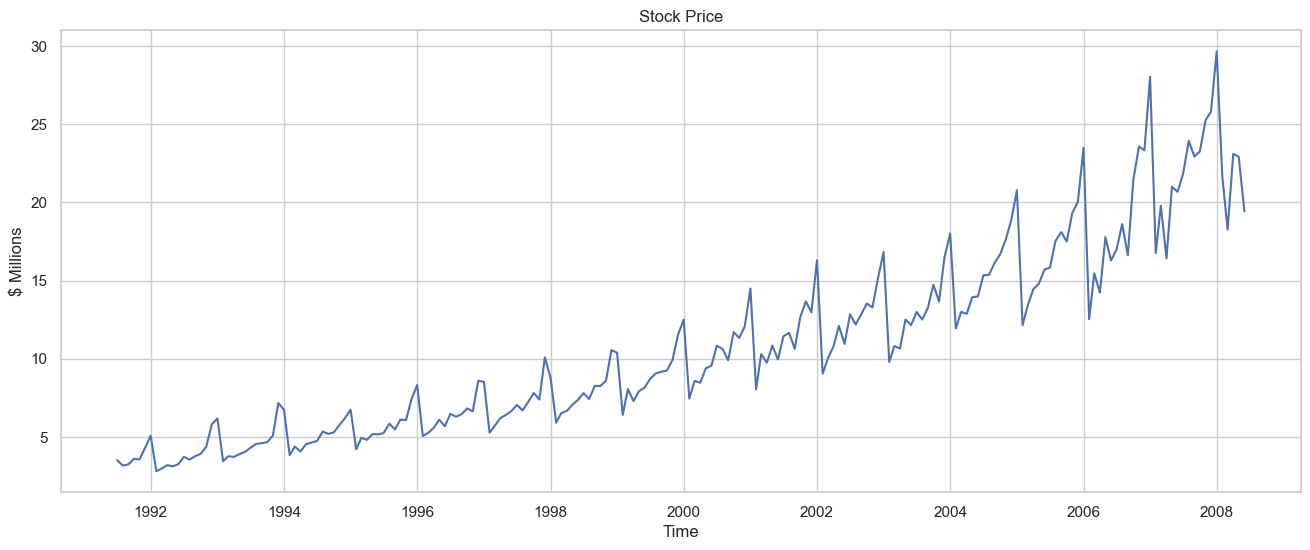

In [9]:
#setting the size of the plot
plt.figure(figsize=(16,6))
plt.plot(ts["ds"], ts["y"])
plt.xlabel("Time")
plt.ylabel("$ Millions")
plt.title("Stock Price")


### Insights from the Time Plot
    There is a clear and increasing trend

    There is also a strong seasonal pattern that increases in size as the level of the series increases

Any forecasts of this series would need to capture the seasonal pattern and the fact that the trend is changing

### Stacked Line Charts
    These are another way of viewing the time-series data

    Here, we have kept the month on the x-axis, revenue on the y-axis, and year in color

In [10]:
# Stacked Line Chart example
ts["year"] = ts["ds"].dt.year
ts["month"] = ts["ds"].dt.strftime('%b')
ts.head()


,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


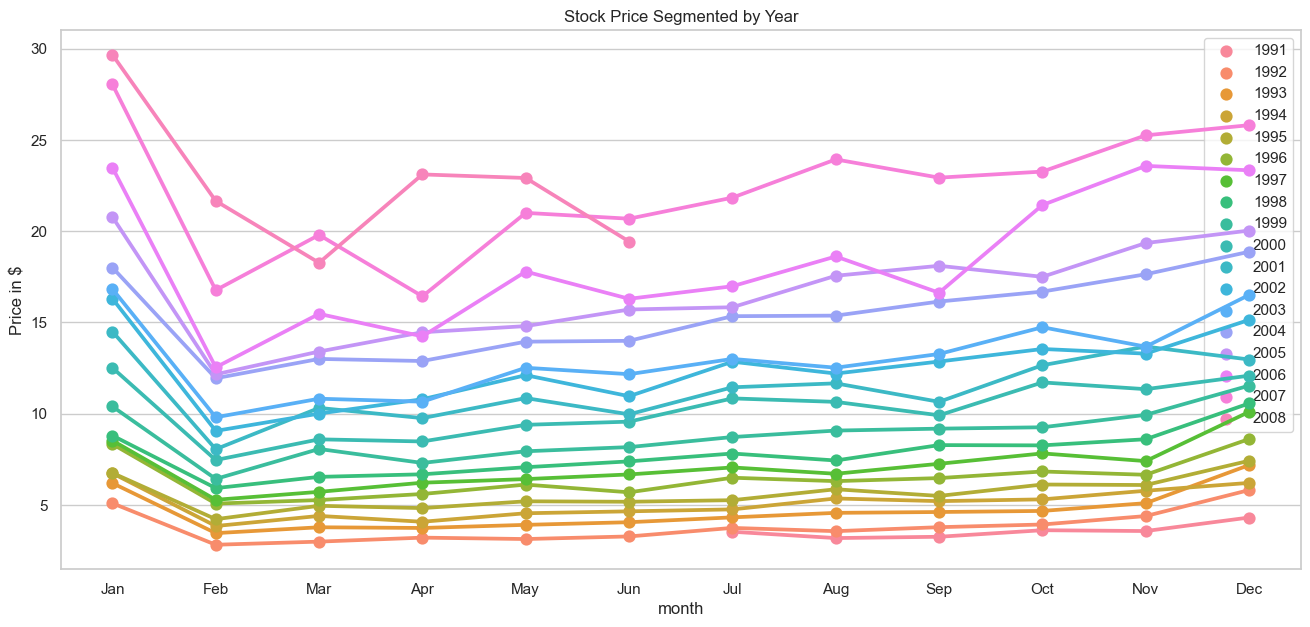

In [12]:
#Setting the size of the plot
plt.figure(figsize =(16,7))
sn.pointplot(x="month", y="y", hue="year", data=ts, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year")
plt.legend(loc='upper right')
